In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from KPLA.data.data_generator import (
    gen_multienv_class_discrete_z,
    convert_to_numpy,
)

# Parameters

In [2]:
seed = 192
n_env = 3
task = 1

source_path = "/home/nschiou2/proxy_latent_shifts/tests/binaryclf_multisource/tmp_data/"

# Generate data

In [3]:
partition_dict = {"train": 0.8, "test": 0.2}
source_n = 4000
target_n = 12000

# Generate source with 3 environments
source_train_list_gen = []
source_test_list_gen = []

for z_env in range(n_env):
    source_train, source_test = gen_multienv_class_discrete_z(
        z_env, seed + z_env, source_n, task, partition_dict
    )
    source_train_list_gen.append(convert_to_numpy(source_train.copy()))
    source_test_list_gen.append(convert_to_numpy(source_test.copy()))

target_train_list_gen = []
target_test_list_gen = []

target_train, target_test = gen_multienv_class_discrete_z(
    n_env + 1,
    seed + n_env + 1,
    target_n,
    task,
    partition_dict,
)
target_train_list_gen.append(convert_to_numpy(target_train.copy()))
target_test_list_gen.append(convert_to_numpy(target_test.copy()))

CUDA backend failed to initialize: Found cuBLAS version 11000, but JAX was built against version 111103, which is newer. The copy of cuBLAS that is installed must be at least as new as the version against which JAX was built. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


# Load data

In [4]:
def load_data(s_path, seed):

    source_train_list_mmd = []
    source_test_list_mmd = []

    for z_env in range(n_env):
        source_train = np.load(
            f"{s_path}/source_{z_env}_seed{seed}_train.npy",
            allow_pickle=True,
        ).item()
        source_test = np.load(
            f"{s_path}/source_{z_env}_seed{seed}_test.npy",
            allow_pickle=True,
        ).item()
        source_train_list_mmd.append(convert_to_numpy(source_train.copy()))
        source_test_list_mmd.append(convert_to_numpy(source_test.copy()))

    target_train_list_mmd = []
    target_test_list_mmd = []

    target_train = np.load(
        f"{s_path}/target_seed{seed}_train.npy",
        allow_pickle=True,
    ).item()
    target_test = np.load(
        f"{s_path}/target_seed{seed}_test.npy",
        allow_pickle=True,
    ).item()
    target_train_list_mmd.append(convert_to_numpy(target_train.copy()))
    target_test_list_mmd.append(convert_to_numpy(target_test.copy()))

    return (
        source_train_list_mmd,
        source_test_list_mmd,
        target_train_list_mmd,
        target_test_list_mmd,
    )

In [7]:
(
        source_train_list_load,
        source_test_list_load,
        target_train_list_load,
        target_test_list_load,
    ) = load_data(
        os.path.join(
            source_path, f"task_{task}", f"seed{seed}"
        ),
        seed=seed,
    )

In [9]:
(
        source_train_list_orig,
        source_test_list_orig,
        target_train_list_orig,
        target_test_list_orig,
    ) = load_data(
        os.path.join(
            "/home/nschiou2/proxy_latent_shifts/tests/binaryclf_multisource/tmp_data_orig/",
            f"task_{task}",
            f"seed{seed}"
        ),
        seed=seed,
    )

# Compare distributional statistics

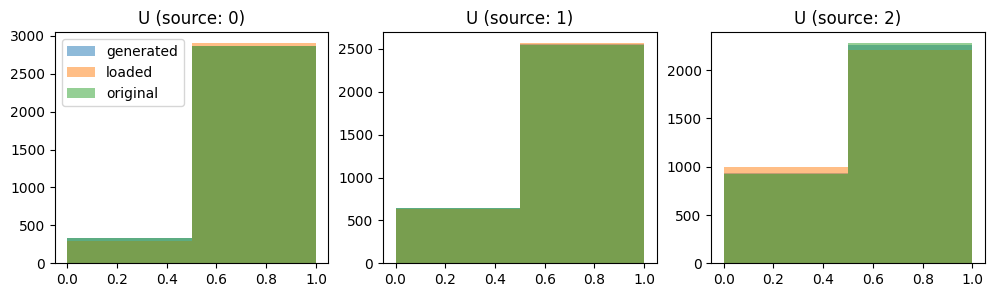

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
for i in range(n_env):
    ax[i].hist(source_train_list_gen[i]["U"], bins=2, alpha=0.5)
    ax[i].hist(source_train_list_load[i]["U"], bins=2, alpha=0.5)
    ax[i].hist(source_train_list_orig[i]["U"], bins=2, alpha=0.5)
    ax[i].set_title(f"U (source: {i})")
ax[0].legend(["generated", "loaded", "original"])
plt.show()

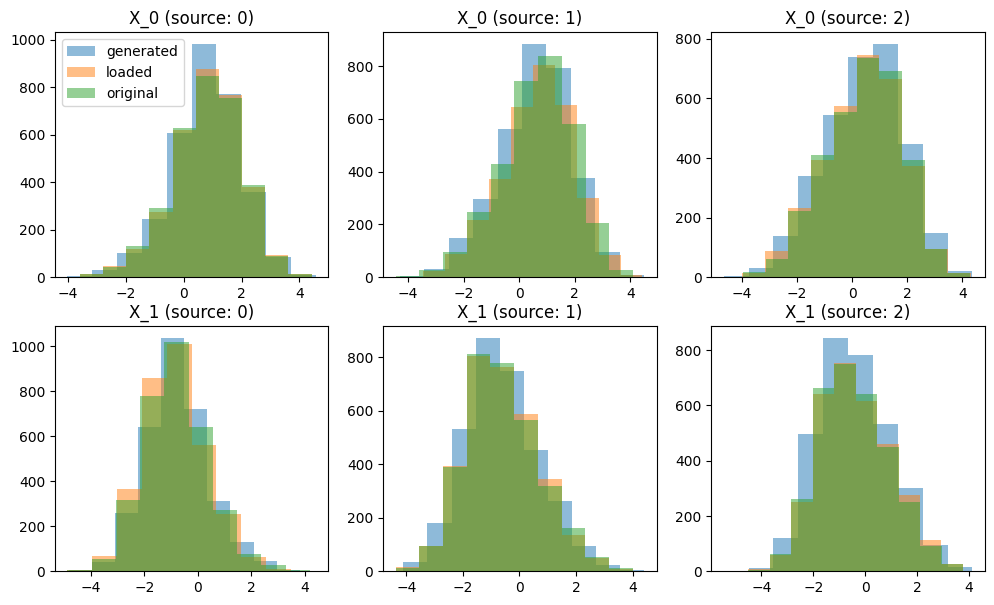

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(12, 7))
for i in range(n_env):
    for j in range(2):
        ax[j, i].hist(source_train_list_gen[i]["X"][:, j], alpha=0.5)
        ax[j, i].hist(source_train_list_load[i]["X"][:, j], alpha=0.5)
        ax[j, i].hist(source_train_list_orig[i]["X"][:, j], alpha=0.5)
        ax[j, i].set_title(f"X_{j} (source: {i})")
ax[0, 0].legend(["generated", "loaded", "original"])
plt.show()

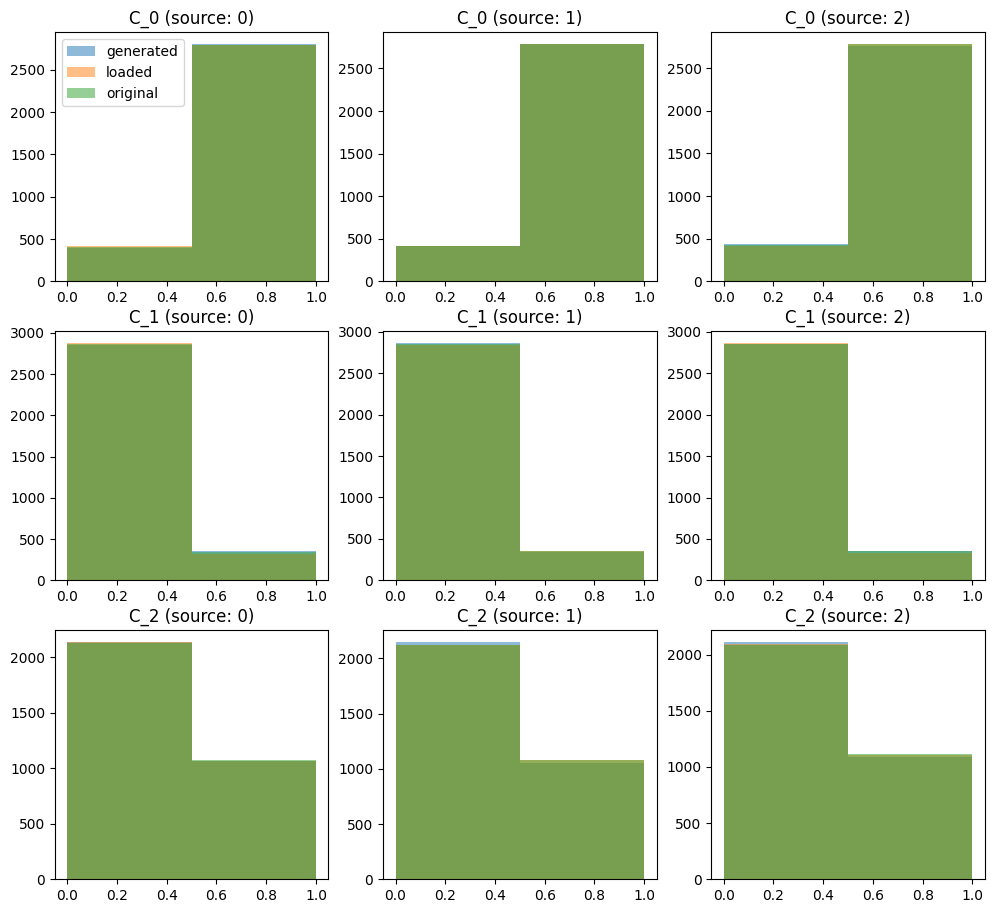

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(12, 11))
for i in range(n_env):
    for j in range(3):
        ax[j, i].hist(
            source_train_list_gen[i]["C"][:, j].astype(int), bins=2, alpha=0.5
            )
        ax[j, i].hist(
            source_train_list_load[i]["C"][:, j].astype(int), bins=2, alpha=0.5
            )
        ax[j, i].hist(
            source_train_list_orig[i]["C"][:, j].astype(int), bins=2, alpha=0.5
            )
        ax[j, i].set_title(f"C_{j} (source: {i})")
ax[0, 0].legend(["generated", "loaded", "original"])
plt.show()

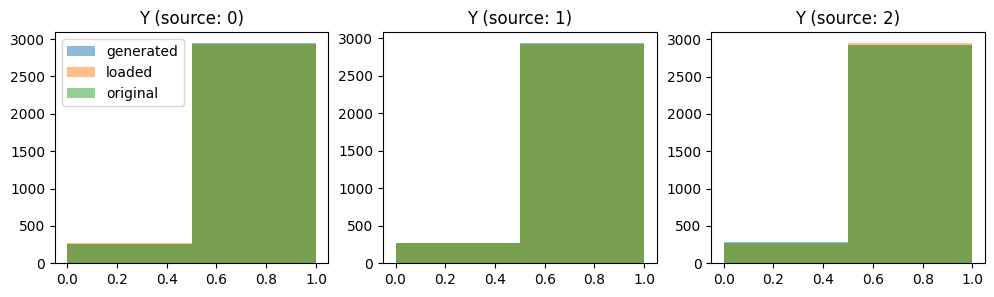

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
for i in range(n_env):
    ax[i].hist(source_train_list_gen[i]["Y"].astype(int), bins=2, alpha=0.5)
    ax[i].hist(source_train_list_load[i]["Y"].astype(int), bins=2, alpha=0.5)
    ax[i].hist(source_train_list_orig[i]["Y"].astype(int), bins=2, alpha=0.5)
    ax[i].set_title(f"Y (source: {i})")
ax[0].legend(["generated", "loaded", "original"])
plt.show()

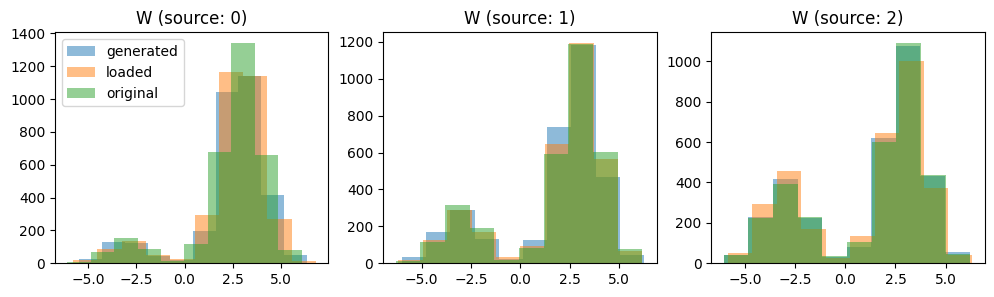

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(12, 3))
for i in range(n_env):
    ax[i].hist(source_train_list_gen[i]["W"], alpha=0.5)
    ax[i].hist(source_train_list_load[i]["W"], alpha=0.5)
    ax[i].hist(source_train_list_orig[i]["W"], alpha=0.5)
    ax[i].set_title(f"W (source: {i})")
ax[0].legend(["generated", "loaded", "original"])
plt.show()